# Titanic Dataset: Análise Exploratória

Neste notebook, vamos analisar os dados do Titanic disponíveis no Kaggle.

## Metadados

* pclass ...... Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival .... Survival (0 = No; 1 = Yes)
* name ........ Name
* sex ......... Sex
* age ......... Age
* sibsp ....... Number of Siblings/Spouses Aboard
* parch ....... Number of Parents/Children Aboard
* ticket ...... Ticket Number
* fare ........ Passenger Fare
* cabin ....... Cabin
* embarked .... Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


## Análises

Vamos tentar responder as questões: 

- Quem eram os passageiros do Titanic? (Sexo, Classe, Idade, etc..)
- Em qual deck os passageiros estavam e qual a relação com a classe?
- De onde os passageiros vieram?
- Quem estava viajando sozinho e com a família?
- Quais fatores influenciaram na sobrevivência?

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
data = pd.read_csv("Dados/titan_train.csv")
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Com o resumo dos dados, podemos observar que a base possui <b>891 passageiros</b>, onde a idade média é de aproximadamente <b>30 anos</b>. A criança mais jovem possui <b>4 meses</b> e o mais Idoso possui <b>80 anos</b>.

Na coluna <u>Sobreviveu</u>, o 1 significa que sobreviveu e o 0 que morreu, então olhando para a média, podemos dizer que aproximadamente <b>38%</b> dos passageiros sobreviveram ao incidente.

Podemos observar também que estão faltando muitos dados da coluna <u>Cabine</u> e que a coluna <u>Idade</u> está incompleta. As análises em cima dos dados destas colunas podem não ficar tão precisos.

## Organização e Limpeza dos Dados



In [97]:
# Divisão da faixa etária
# 0 a 15 anos - Criança
# 16 a 59 anos - Adulto
# 60 ou mais - Idoso
var_faixaEtaria = ['Criança', 'Adulto', 'Idoso']
def FaixaEtaria(idade):
    if idade < 16: return var_faixaEtaria[0]
    elif idade < 60: return var_faixaEtaria[1]
    else: return var_faixaEtaria[2]

# Portos ordenados pela rota da viagem
# Southampton (Inglaterra)
# Cherbourg-Octeville (França) 
# Queenstown (Irlanda) 
# Destino final: Nova Iorque (Estados Unidos)
var_porto = ['Southampton','Cherbourg','Queenstown']
def Porto(sigla):
    if sigla == 'S': return var_porto[0]
    elif sigla == 'C': return var_porto[1]
    else: return var_porto[2]
    
# Passageiro viajava sozinho (Sim ou Não)
def Sozinho(parentes): return 'Não' if parentes else 'Sim'
    
# Inclusão da Faixa etária no Dataset
data["FaixaEtaria"] = data['Age'].apply(FaixaEtaria)

# Inclusão do nome do Porto no Dataset
data['Porto'] = data['Embarked'].apply(Porto)

# Inclusão da coluna sozinho no Dataset
data['Sozinho'] = data.SibSp + data.Parch
data['Sozinho'] = data['Sozinho'].apply(Sozinho)

# Separação do código do número da Cabine
data['Cabine'] = data['Cabin'].str[0]
var_cabine = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

## Quem eram os passageiros do Titanic?

Vamos vizualizar os dados dos passageiros

Sex
female    314
male      577
Name: PassengerId, dtype: int64
              Sex
Sex              
female  35.241302
male    64.758698


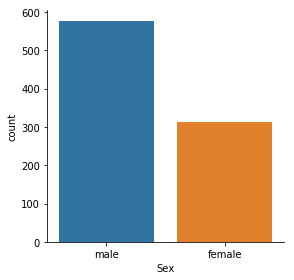

In [63]:
sns.factorplot('Sex',data=data,kind='count')
print(data.groupby('Sex').PassengerId.count())
print(data.groupby('Sex').agg({'Sex':'count'}).apply(lambda x: 100 * x / float(x.sum())))

Sem muitas surpresas, os passageiros eram 577 homens (64,8%) e 314 mulheres (35,2%).

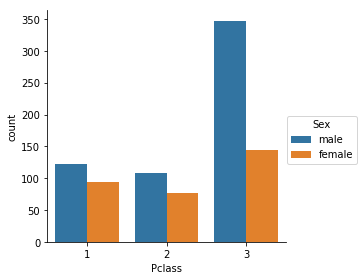

In [104]:
sns.factorplot('Pclass',data=data,hue='Sex',kind='count')

Uma observação interessante, a maior parte dos passageiros homens em relação as mulheres estava na 3ª classe.

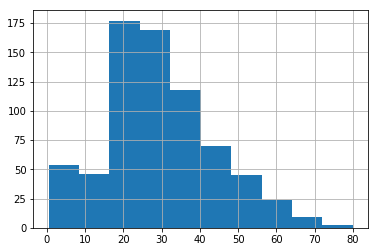

In [109]:
data['Age'].hist()

A idade da grande maioria dos passageiros era de 18 e 40 anos. Estavam a bordo também algumas crianças e poucos idosos, onde quanto mais avançada era a idade, menos passageiros estavam abordo.

Adulto     605
Idoso      203
Criança     83
Name: FaixaEtaria, dtype: int64
             FaixaEtaria
FaixaEtaria             
Adulto         67.901235
Criança         9.315376
Idoso          22.783389


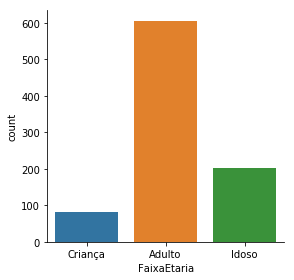

In [79]:
sns.factorplot('FaixaEtaria',data=data,kind='count',order=var_faixaEtaria)
print(data['FaixaEtaria'].value_counts())
print(data.groupby('FaixaEtaria').agg({'FaixaEtaria':'count'}).apply(lambda x: 100 * x / float(x.sum())))

Os passageiros eram 83 crianças (9,3%), 605 adultos (67,9%) e 203 idosos (22,7%).

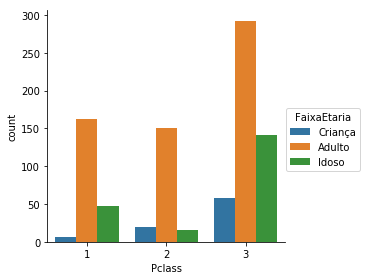

In [83]:
sns.factorplot('Pclass',data=data,hue='FaixaEtaria',kind='count',hue_order=var_faixaEtaria)

Podemos obervar que a maior parte dos idosos estava na 3ª classe, é uma proporção em relação das outras classes que chama a atenção. 

## Em qual deck os passageiros estavam e qual a relação com a classe?

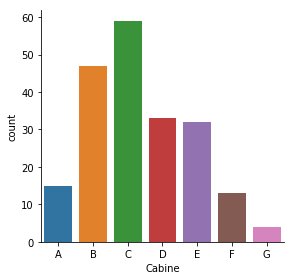

In [100]:
sns.factorplot('Cabine',data=data,kind='count',order=var_cabine)

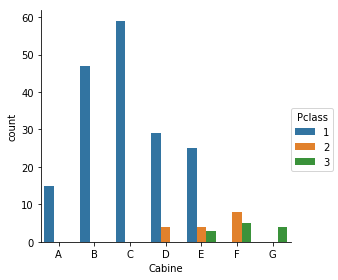

In [98]:
sns.factorplot('Cabine',data=data,hue='Pclass',kind='count',order=var_cabine)

Percebmos que os passageiros da 1ª classe ficaram exclusivamente nos decks A, B, C e os passageiros de 3ª classe só tiveram acesso a partir do deck E. Não podemos esquecer que os dados das cabines não estavam completos, então a análise fica superficial.

## De onde os passageiros vieram?

O roteiro do titanic estava planejado para partir de Southampton (Inglaterra), passar por Cherbourg-Octeville (França) e Queenstown (Irlanda) onde mais passageiros embarcariam e tendo como destino final Nova Iorque (Estados Unidos).

![title](Imagens/titanic-route.gif)

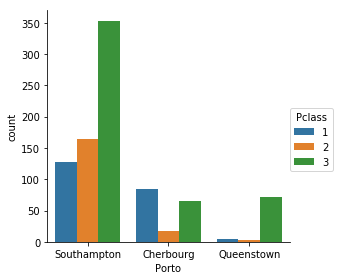

In [86]:
sns.factorplot('Porto',data=data,hue='Pclass',kind='count',row_order=var_porto)

A grande maioria dos passageiros embarcaram na cidade de Southampton, ponto de partida do Titanic, e na cidade de Queenstown, a grande maioria de passageiros que embarcou eram idosos.

## Sobreviventes por Classe

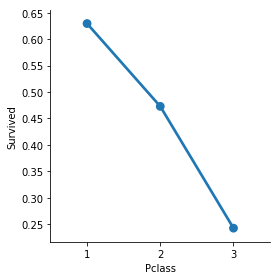

In [242]:
sns.factorplot('Pclass','Survived',data=data,ci=None)

## Sobreviventes por Sexo

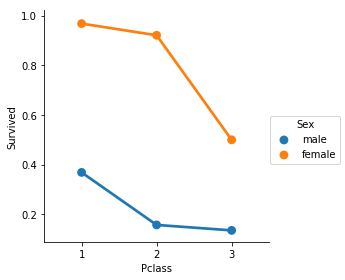

In [238]:
sns.factorplot('Pclass','Survived',data=data,hue='Sex',ci=None)

## Sobreviventes por Idade

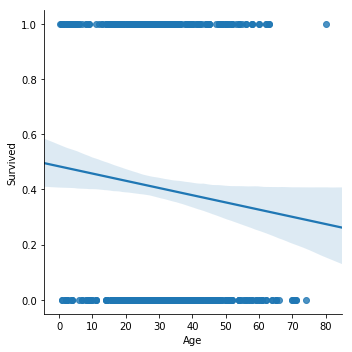

In [165]:
sns.lmplot('Age','Survived',data=data)

## Sobreviventes por Faixa Etária

In [24]:
sns.factorplot('FaixaEtaria','Survived',data=data,hue='Sex',ci=None,order=['Colo','Criança','Jovem','Adulto','Idoso'])

ValueError: Could not interpret input 'FaixaEtaria'

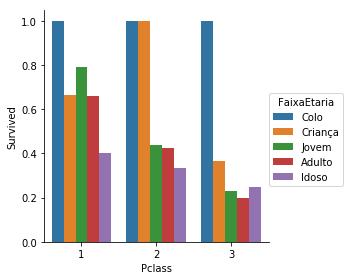

In [304]:
sns.factorplot('Pclass','Survived',data=data,hue='FaixaEtaria',kind='bar',ci=None,hue_order=['Colo','Criança','Jovem','Adulto','Idoso'])

## Sobreviventes com parentes abordo

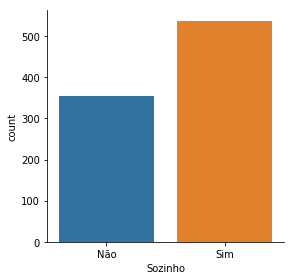

In [200]:
def Sozinho(parentes):
    return 'Não' if parentes else 'Sim'

data['Sozinho'] = data.SibSp + data.Parch
data['Sozinho'] = data['Sozinho'].apply(Sozinho)

sns.factorplot('Sozinho',data=data,kind='count')

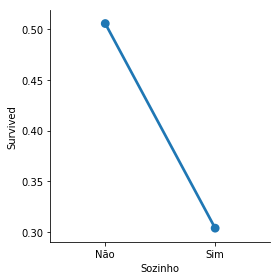

In [369]:
sns.factorplot('Sozinho','Survived',data=data,ci=None)

In [370]:
data['Surname'] = data['Name'].str.split(',',expand=True)[0]
data.groupby('Surname').PassengerId.count().sort_values(ascending=False).head()

Surname
Andersson    9
Sage         7
Skoog        6
Johnson      6
Panula       6
Name: PassengerId, dtype: int64

## Resumo

Agora falando um pouco sobre os sobreviventes da tragédia.
Pode-se verificar que 63% dos passageiros da 1ª classe sobreviveram, 48% da 2ª classe e 25% da 3ª classe.

Tambem percebe-se que houve prioridade em salvar as mulheres que estavam a bordo, em sua grande maiora da 1ª e 2ª classe.

Os passageiros com menor idade tiveram prioridade no embarque dos botes salva-vidas e idosos acabaram não sobrevivendo.

Passageiros que estavam com suas famílias (esposo(a), filhos, irmãos, pai, mãe) conseguiram sobreviver com percentuam aproximado de 51% e quem estava sozinho, somente 31%.